### Stock Market Prediction using Financial News and Stock Price Integration Dataset


### Import necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# modify python path to get modules in parent folder
import sys 
sys.path.append("..")

### Load Dataset

In [3]:
# load the dataset using the module in the parent folder
from src.data.load_data import load_data
df=load_data("../data/raw_analyst_ratings.csv")



read the dataset from ../data/raw_analyst_ratings.csv successfully!


In [4]:
# see our dataset
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


### Exploratory Data Analysis

In [5]:
# see the columns
df.columns


Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [6]:
df.dtypes # see the datatypes

Unnamed: 0     int64
headline      object
url           object
publisher     object
date          object
stock         object
dtype: object

In [7]:
df.isna().sum() # ckeck if there are missing values

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [8]:
df.describe()

,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [10]:
# Drop unnecessary column
df = df.drop(["Unnamed: 0"], axis=1)
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


#### Obtain basic statistics for headline lengths

In [13]:
# create column for headline length
df["headline_length"]=df["headline"].apply(len)
df.headline_length.head()

0    39
1    42
2    29
3    44
4    87
Name: headline_length, dtype: int64

Text(0, 0.5, 'Frequency')

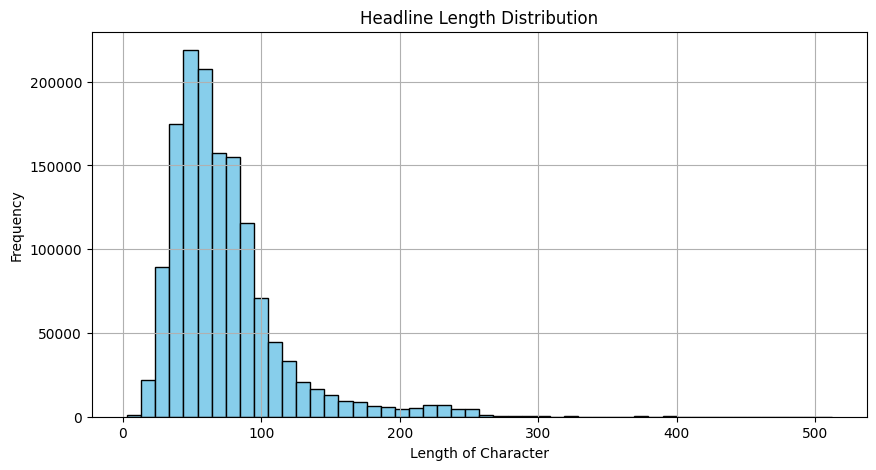

In [25]:
# visualize the headline length distribution
plt.figure(figsize=(10,5))
df.headline_length.hist(bins=50,color="skyblue",edgecolor="black")
plt.title("Headline Length Distribution")
plt.xlabel("Length of Character")
plt.ylabel("Frequency")

In [12]:
# view discriptive statistics
df.headline_length.describe()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

#### Count number of articles per publisher

In [14]:
publisher_counts=df.publisher.value_counts()
publisher_counts

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64

Text(0, 0.5, 'Number')

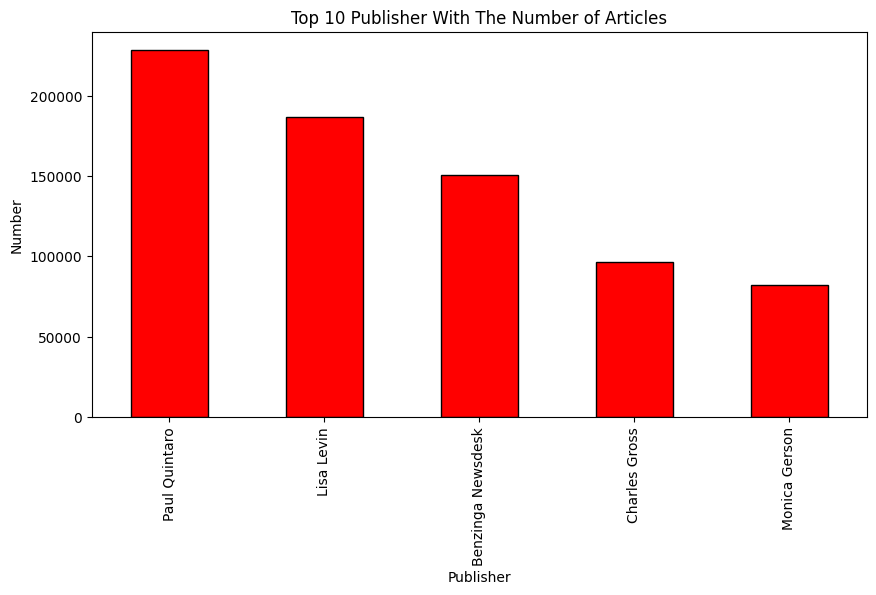

In [29]:
# visualize the top 10 publisher
top_10_publisher=df['publisher'].value_counts().head()
plt.figure(figsize=(10,5))
top_10_publisher.plot(kind='bar',color='red',edgecolor='black')
plt.title("Top 10 Publisher With The Number of Articles")
plt.xlabel("Publisher")
plt.ylabel("Number")



#### Analyze Publication Date For Trends

In [19]:
# convert date to datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")
# check result
print(df["date"].dtype)
df.head()


datetime64[ns, UTC-04:00]


,headline,url,publisher,date,stock,headline_length
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


In [20]:
# count the number of articles per day
articles_per_day=df.groupby(df["date"].dt.date).size()
articles_per_day

date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Length: 2528, dtype: int64

In [22]:
# count the number of articles per month
articles_per_month=df.groupby(df["date"].dt.month).size()
articles_per_month

date
1.0      3068
2.0      4091
3.0      6391
4.0      6468
5.0     11363
6.0      7968
7.0      2131
8.0      2858
9.0      2417
10.0     3079
11.0     3210
12.0     2943
dtype: int64

In [23]:
# count the number of articles per weekday
articles_per_weekday=df.groupby(df["date"].dt.day_name()).size()
articles_per_weekday

date
Friday        9381
Monday       10322
Saturday       267
Sunday         436
Thursday     12688
Tuesday      11002
Wednesday    11891
dtype: int64